# Graduates by Institutions and Government Expenditure on Education

---

## Main Question

1. How does the total number of graduates get affected by the total government expenditure ?

---

## List of URLs used:


1. Graduates by Institutions<br>
   https://data.gov.sg/dataset/intake-enrolment-and-graduates-by-institutions?resource_id=2264a6ed-51f5-45d6-accb-1a980e32e632
   
   
2. Government Total Expenditure on Education<br>
   https://data.gov.sg/dataset/government-expenditure-on-education
   
   
3. The relationship between graduates and economic growth across countries<br>
   https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/229492/bis-13-858-relationship-between-graduates-and-economic-growth-across-countries.pdf

---

## Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization   

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # we only need pyplot

---

## Setup : Import the Dataset

In [3]:
graduatesData = pd.read_csv('graduates-by-institutions.csv', index_col = 'year')
graduatesData

,sex,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
year,,,,,,,,,,,,,,,,,,
1983,MF,2905,0,-,-,-,-,597,1624,928,-,-,-,-,-,-,-,6779
1983,F,1508,0,-,-,-,-,453,316,343,-,-,-,-,-,-,-,905
1984,MF,3409,0,-,-,-,-,875,1773,1293,-,-,-,-,-,-,-,6281
1984,F,1826,0,-,-,-,-,687,371,456,-,-,-,-,-,-,-,1785
1985,MF,3454,557,-,-,-,-,531,1862,1543,-,-,-,-,-,-,-,7597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,F,3332,3066,1030,539,93,-,1076,1984,2512,2495,2727,2493,226,286,365,18,4863
2017,MF,6446,6174,1779,1494,267,-,1292,4924,4886,5012,4999,4389,331,466,591,34,12858
2017,F,3350,3266,920,695,107,-,899,2000,2400,2516,2605,2407,237,318,447,22,4808


In [4]:
govtExpenditureData = pd.read_csv('government-expenditure-on-education.csv', index_col = 'year')
govtExpenditureData.head()

,total_expenditure_on_education
year,
1981,942517
1982,1358430
1983,1611647
1984,1769728
1985,1812376


### Background Information 


Datasets:

1. `graduatesData`

  - The datasets show the number of full-time graduates in post-secondary education institutions.
  - The variable `sex` which consist of the values 'MF' and 'F', represents Male and Female respectively.
  - University figures are for first degree (Undergraduates) only.
  - National Institute of Education (NIE) figures are for Diplomas and Post-graduate Diplomas in education-related subjects. BA / BSc (Education) figures are included under Nanyang Technological University.
  - Polytechnic figures are for full-time diploma courses only. 
  - LASALLE College of the Arts and Nanyang Academy of Fine Arts (NAFA) first degree figures are for publicly-funded full-time courses (started in 2012 and 2011 respectively) only.
  - Institute of Technical Education (ITE) was established in 1992 to replace the former Vocational & Industrial Training Board. ITE figures exclude apprentices.
  - The dataset coverage period ranges from 1982-01-01 to 2018-12-31.
   
   
2. `govtExpenditureData`
  - The datasets shows the total amount spent by government on education over the years in S$ Thousand.
  - The dataset coverage period ranges from 1981-01-01 to 2018-12-31.

Post-secondary education institutions which are listed in the datasets.

In [5]:
institutions = ['nus', 'ntu', 'smu', 'sit', 'sutd', 'suss', 'nie', 'singapore_polytechnic', 'ngee_ann_polytechnic', 'temasek_polytechnic', 'nanyang_polytechnic', 'republic_polytechnic', 'lasalle_diploma', 'lasalle_degree', 'nafa_diploma', 'nafa_degree', 'ite']

---

## Data Cleaning

As you may have noticed, some of the values in the datasets are set to '-'. Which means the institutions haven't been established at the time yet. Hence, we can ignore the time period where the values are set to '-'.

In [6]:
# Replace the '-' value to np.NaN
graduatesData = graduatesData.replace('-', np.NaN)

To have a better structure for analysis, all the categorical variables should be a `str` type. While numerical variables should be an `int64` or `float64` type.

**Categorical Variables**
1. `year`
2. `sex`
3. `institutions`

**Numerical Variables**
1. `number of graduates` 
2. `total expenditure on education`

In [7]:
# Convert the number of graduates to an Integer Datatype for each institution
for institution in institutions:
    graduatesData[institution] = pd.to_numeric(graduatesData[institution])

---

## Data Transformation

The dataframe `maleGraduates` and `femaleGraduates` represents the number of male and female graduates respectively across institutions. 

In [8]:
# Make sub dataframe for each type of gender (Male and Female)
maleGraduates = graduatesData[graduatesData['sex'] == 'MF'].drop(columns=['sex'])
femaleGraduates = graduatesData[graduatesData['sex'] == 'F'].drop(columns=['sex'])

The dataframe `govtData` represents the number graduates across with its respective expenditure on education.

In [9]:
# Make sub dataframe for the total number of graduates
govtData = pd.DataFrame(maleGraduates.add(femaleGraduates, fill_value=0).sum(axis=1).to_frame('graduates'))

# Join the respective expenditure to the number of graduates
govtData = govtData.join(govtExpenditureData, how='outer')

---

## Data Analysis

### Relationship between Total Number of Graduates and the Annual Expenditure

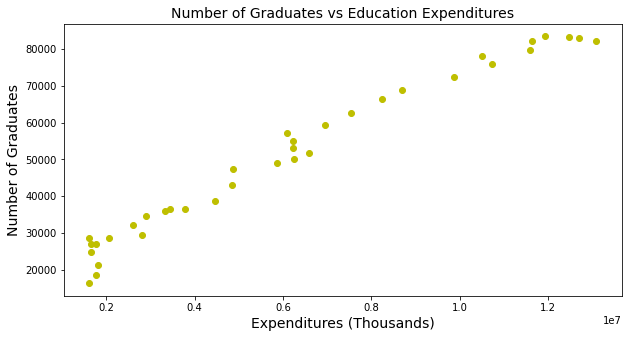

In [11]:
# Sets Figure Size
fig, ax = plt.subplots()
fig.set_size_inches([10,5])

# Sets X and Y Axis Label
ax.set_xlabel('Expenditures (Thousands)', fontsize=14)
ax.set_ylabel('Number of Graduates', fontsize=14)

# Plotting a Scatter plot of Total Number of Graduates against Expenditure on Education 
ax.scatter(govtData['total_expenditure_on_education'], govtData['graduates'], color='y', marker='o')

# Set Graph Title
plt.title('Number of Graduates vs Education Expenditures', fontsize = 14)

# Display the graph
plt.show()

As we can see from the scatter plot above, it shows that the number of graduates and the government expenditure have a linear relationship. As the expenditure increases, the number of graduates also increase linearly.

Hence, this indicates a healthy economy where an increase in the amount of money spent in the education sector results in an increase in the number of graduates which leads to a increase on the economic performance. In conclusion, the analysis reveals that education can have an impact on the economic performance of a country.